In [1]:
import os
from PIL import Image

In [2]:
def process_images(input_folder, output_folder):
    # 確保輸出資料夾存在
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # 遍歷資料夾內的 PNG 檔案
    for filename in os.listdir(input_folder):
        if filename.endswith('.png'):
            input_path = os.path.join(input_folder, filename)
            
            # 打開圖片
            with Image.open(input_path) as img:
                # 輸出原始圖片尺寸
                print(f"{filename}: {img.size}")

                # 計算裁切的上半部分
                width, height = img.size
                cropped_img = img.crop((0, 0, width, height // 2))
                
                # 儲存裁切後的圖片
                output_path = os.path.join(output_folder, filename)
                cropped_img.save(output_path)
                print(f"Saved cropped image to {output_path}")

In [3]:
input_folder = '../SHHQ-1.0_samples/'
output_folder = '../SHHQ-1.0_samples_/'
process_images(input_folder, output_folder)

573.png: (512, 1024)
Saved cropped image to ../SHHQ-1.0_samples_/573.png
38725.png: (512, 1024)
Saved cropped image to ../SHHQ-1.0_samples_/38725.png
25748.png: (512, 1024)
Saved cropped image to ../SHHQ-1.0_samples_/25748.png
24708.png: (512, 1024)
Saved cropped image to ../SHHQ-1.0_samples_/24708.png
24108.png: (512, 1024)
Saved cropped image to ../SHHQ-1.0_samples_/24108.png
12055.png: (512, 1024)
Saved cropped image to ../SHHQ-1.0_samples_/12055.png
11600.png: (512, 1024)
Saved cropped image to ../SHHQ-1.0_samples_/11600.png
10395.png: (512, 1024)
Saved cropped image to ../SHHQ-1.0_samples_/10395.png
26592.png: (512, 1024)
Saved cropped image to ../SHHQ-1.0_samples_/26592.png
31614.png: (512, 1024)
Saved cropped image to ../SHHQ-1.0_samples_/31614.png
34802.png: (512, 1024)
Saved cropped image to ../SHHQ-1.0_samples_/34802.png
4919.png: (512, 1024)
Saved cropped image to ../SHHQ-1.0_samples_/4919.png
35113.png: (512, 1024)
Saved cropped image to ../SHHQ-1.0_samples_/35113.png
19771

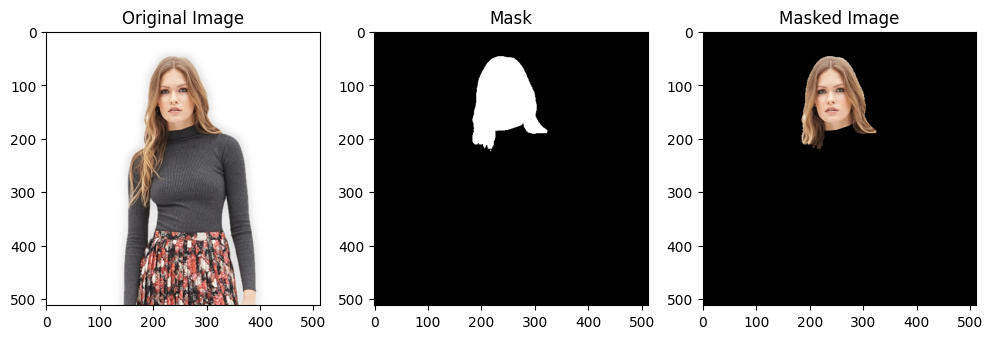

In [3]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def apply_mask_with_blackout(image_path, mask_path):
    # 讀取圖片和遮罩
    image = Image.open(image_path).convert("RGB")  # 確保圖片為 RGB 格式
    mask = Image.open(mask_path).convert("L")      # 確保遮罩為灰階格式

    # 轉換為 NumPy 陣列
    image_np = np.array(image)
    mask_np = np.array(mask)

    # 將遮罩應用到圖片上：遮罩為 0 的地方設為黑色
    masked_image_np = np.where(mask_np[..., None] > 0, image_np, 0)

    # 將結果轉回 PIL 圖片
    masked_image = Image.fromarray(masked_image_np.astype(np.uint8))

    # 顯示結果
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image)

    plt.subplot(1, 3, 2)
    plt.title("Mask")
    plt.imshow(mask, cmap="gray")

    plt.subplot(1, 3, 3)
    plt.title("Masked Image")
    plt.imshow(masked_image)

    plt.show()

# 使用範例
image_path = '../SHHQ-1.0_samples/2581.png'  # 替換成圖片的路徑
mask_path = '../SHHQ-1.0_samples/face_masks/2581.png'    # 替換成遮罩的路徑
apply_mask_with_blackout(image_path, mask_path)